In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

## Fetch the data and load it in pandas

In [5]:
data = pd.read_csv("data_amadeus.csv")

In [6]:
data.head()

,DateOfDeparture,Departure,Arrival,WeeksToDeparture,PAX,log_PAX,std_wtd
0,2011-09-01,ATL,BOS,11.560000,536,6.284134,8.057502
1,2011-09-01,ATL,CLT,8.705882,327,5.789960,7.156856
2,2011-09-01,ATL,DEN,10.681818,381,5.942799,6.806064
3,2011-09-01,ATL,DFW,8.600000,703,6.555357,5.924081
4,2011-09-01,ATL,DTW,11.840000,393,5.973810,8.101852


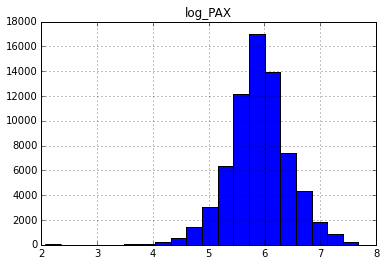

In [7]:
data.hist(column='log_PAX', bins=20);

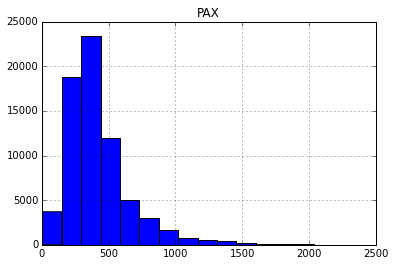

In [8]:
data.hist(column='PAX', bins=15);

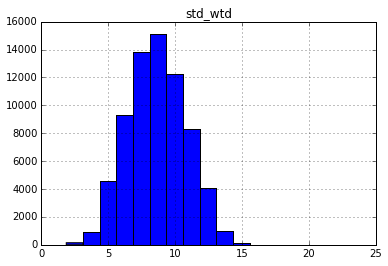

In [9]:
data.hist('std_wtd', bins=15);

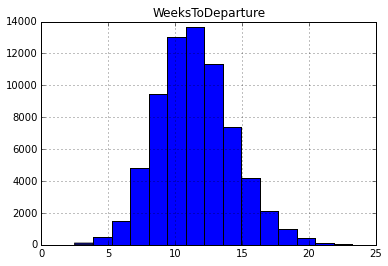

In [10]:
data.hist('WeeksToDeparture', bins=15);

In [11]:
print data['log_PAX'].mean()
print data['log_PAX'].std()

5.90271230525
0.537554074674


## Preprocessing for prediction

In [27]:
data_encoded = data

data_encoded = data_encoded.join(pd.get_dummies(data_encoded['Departure'], prefix='d'))
data_encoded = data_encoded.join(pd.get_dummies(data_encoded['Arrival'], prefix='a'))
data_encoded = data_encoded.drop('Departure', axis=1)
data_encoded = data_encoded.drop('Arrival', axis=1)

# following http://stackoverflow.com/questions/16453644/regression-with-date-variable-using-scikit-learn
data_encoded['DateOfDeparture'] = pd.to_datetime(data_encoded['DateOfDeparture'])
data_encoded['year'] = data_encoded['DateOfDeparture'].dt.year
data_encoded['month'] = data_encoded['DateOfDeparture'].dt.month
data_encoded['day'] = data_encoded['DateOfDeparture'].dt.day
data_encoded['weekday'] = data_encoded['DateOfDeparture'].dt.weekday
data_encoded['week'] = data_encoded['DateOfDeparture'].dt.week
data_encoded['n_days'] = data_encoded['DateOfDeparture'].apply(lambda date: (date - pd.to_datetime("1970-01-01")).days)

data_encoded = data_encoded.join(pd.get_dummies(data_encoded['year'], prefix='y'))
data_encoded = data_encoded.join(pd.get_dummies(data_encoded['month'], prefix='m'))
data_encoded = data_encoded.join(pd.get_dummies(data_encoded['day'], prefix='d'))
data_encoded = data_encoded.join(pd.get_dummies(data_encoded['weekday'], prefix='wd'))
data_encoded = data_encoded.join(pd.get_dummies(data_encoded['week'], prefix='w'))

In [28]:
data_encoded.tail(5)

,DateOfDeparture,WeeksToDeparture,PAX,log_PAX,std_wtd,d_ATL,d_BOS,d_CLT,d_DEN,d_DFW,d_DTW,d_EWR,d_IAH,d_JFK,d_LAS,d_LAX,d_LGA,d_MCO,d_MIA,d_MSP,d_ORD,d_PHL,d_PHX,d_SEA,d_SFO,a_ATL,a_BOS,a_CLT,a_DEN,a_DFW,a_DTW,a_EWR,a_IAH,a_JFK,a_LAS,a_LAX,a_LGA,a_MCO,a_MIA,a_MSP,a_ORD,a_PHL,a_PHX,a_SEA,a_SFO,year,month,day,weekday,week,n_days,y_2011,y_2012,y_2013,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,wd_0,wd_1,wd_2,wd_3,wd_4,wd_5,wd_6,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,w_10,w_11,w_12,w_13,w_14,w_15,w_16,w_17,w_18,w_19,w_20,w_21,w_22,w_23,w_24,w_25,w_26,w_27,w_28,w_29,w_30,w_31,w_32,w_33,w_34,w_35,w_36,w_37,w_38,w_39,w_40,w_41,w_42,w_43,w_44,w_45,w_46,w_47,w_48,w_49,w_50,w_51,w_52
69547,2013-03-05,10.782609,356,5.874931,7.786682,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2013,3,5,1,10,15769,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69548,2013-03-05,10.111111,79,4.369448,10.493073,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2013,3,5,1,10,15769,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69549,2013-03-05,12.500000,454,6.118097,11.308446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2013,3,5,1,10,15769,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69550,2013-03-05,7.285714,174,5.159055,5.469194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2013,3,5,1,10,15769,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69551,2013-03-05,8.833333,218,5.384495,7.180447,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2013,3,5,1,10,15769,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
features = data_encoded.drop(['PAX', 'log_PAX','DateOfDeparture'], axis=1)
X_columns = data_encoded.columns.drop(['PAX', 'log_PAX','DateOfDeparture'])
X = features.values
y = data_encoded['log_PAX'].values

In [30]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

reg = LinearRegression()

scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='mean_squared_error')
print("log RMSE: {:.4f} +/-{:.4f}".format(
    np.mean(np.sqrt(-scores)), np.std(np.sqrt(-scores))))

log RMSE: 0.3368 +/-0.0035


In [14]:
reg.fit(X_train, y_train);

In [15]:
dict(zip(X_columns, reg.coef_))

{'WeeksToDeparture': 0.063875494316897999,
 'a_ATL': 0.18045794192044062,
 'a_BOS': 0.011950544444787978,
 'a_CLT': -0.29650142138681929,
 'a_DEN': -0.0085360010609591627,
 'a_DFW': 0.10484222602935181,
 'a_DTW': -0.29132540907822302,
 'a_EWR': -0.11058810554831047,
 'a_IAH': -0.36317724738993185,
 'a_JFK': 0.43640749266612067,
 'a_LAS': -0.21672057245573734,
 'a_LAX': 0.30099208126545196,
 'a_LGA': 0.52144194034625957,
 'a_MCO': -0.13891356623451395,
 'a_MIA': -0.37826647918183848,
 'a_MSP': -0.022123268651808053,
 'a_ORD': 0.3704095390861597,
 'a_PHL': -0.021376704993368301,
 'a_PHX': -0.15910725107903376,
 'a_SEA': -0.12388286307155802,
 'a_SFO': 0.20401712439178254,
 'd_1': -0.11126556605124971,
 'd_10': 0.061753584343868427,
 'd_11': 0.080933000668297284,
 'd_12': 0.067936484168906283,
 'd_13': 0.07438679051296708,
 'd_14': 0.067334927396389258,
 'd_15': 0.05089322574885724,
 'd_16': 0.041068167644423607,
 'd_17': 0.040601496930160949,
 'd_18': 0.0091015820211488192,
 'd_19': 0.02

Exercise: Visualize the coefficients, try to make sense of them.

## Random Forests

In [16]:
def objective_function(x):
    objective_function.n_iterations += 1
    lg_n_estimators, max_features, lg_max_depth = x
    n_estimators = int(10 ** lg_n_estimators)
    max_features = int(max_features)
    max_depth = int(10 ** lg_max_depth)
    print objective_function.n_iterations, \
        ": n_estimators = ", n_estimators, \
        ": max_features = ", max_features, \
        ": max_depth = ", max_depth
    reg = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth)
    scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='mean_squared_error', n_jobs=3)
    print "log RMSE = ", np.mean(np.sqrt(-scores))
    return np.mean(np.sqrt(-scores))

This may run for a while.

In [29]:
from hyperopt import fmin as hyperopt_fmin
from hyperopt import tpe, hp, STATUS_OK, space_eval

objective_function.n_iterations = 0
best = hyperopt_fmin(objective_function,
    space=(hp.quniform('lg_n_estimators', 0., 3., 0.1),
           hp.quniform('max_features', 1., 10., 1.),
           hp.quniform('lg_max_depth', 0., 2., 0.1),
          ),
    algo=tpe.suggest,
    max_evals=100)

1 : n_estimators =  7 : max_features =  7 : max_depth =  3
log RMSE =  0.484547037486
2 : n_estimators =  158 : max_features =  2 : max_depth =  12
log RMSE =  0.464234980778
3 : n_estimators =  1 : max_features =  6 : max_depth =  19
log RMSE =  0.420496808095
4 : n_estimators =  2 : max_features =  2 : max_depth =  1
log RMSE =  0.522601831141
5 : n_estimators =  1 : max_features =  6 : max_depth =  2
log RMSE =  0.519431181339
6 : n_estimators =  6 : max_features =  9 : max_depth =  1
log RMSE =  0.512106543932
7 : n_estimators =  6 : max_features =  6 : max_depth =  15
log RMSE =  0.384947435892
8 : n_estimators =  7 : max_features =  2 : max_depth =  12
log RMSE =  0.467133999994
9 : n_estimators =  630 : max_features =  7 : max_depth =  6
log RMSE =  0.455892488557
10 : n_estimators =  12 : max_features =  8 : max_depth =  50
log RMSE =  0.277323676848
11 : n_estimators =  2 : max_features =  5 : max_depth =  1
log RMSE =  0.521875966671
12 : n_estimators =  19 : max_features =  

In [32]:
best

{'lg_max_depth': 1.9000000000000001,
 'lg_n_estimators': 2.7,
 'max_features': 10.0}

In [32]:
# hard-saved the best in case you don't want to re-execute the tuning
best = {'lg_max_depth': 1.9,
        'lg_n_estimators': 2.7,
        'max_features': 10.0}

In [33]:
%%time
from sklearn.ensemble import RandomForestRegressor

n_estimators = int(10**best['lg_n_estimators'])
max_depth = int(10**best['lg_max_depth'])
max_features = int(best['max_features'])
print n_estimators, max_depth, max_features
reg = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features)

scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='mean_squared_error',n_jobs=3)
print("log RMSE: {:.4f} +/-{:.4f}".format(
    np.mean(np.sqrt(-scores)), np.std(np.sqrt(-scores))))

501 79 10
log RMSE: 0.2434 +/-0.0024
CPU times: user 917 ms, sys: 1.13 s, total: 2.05 s
Wall time: 4min 17s


## Variable importances

In [21]:
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=79,
           max_features=10, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=501, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [33]:
len(X_columns)

153

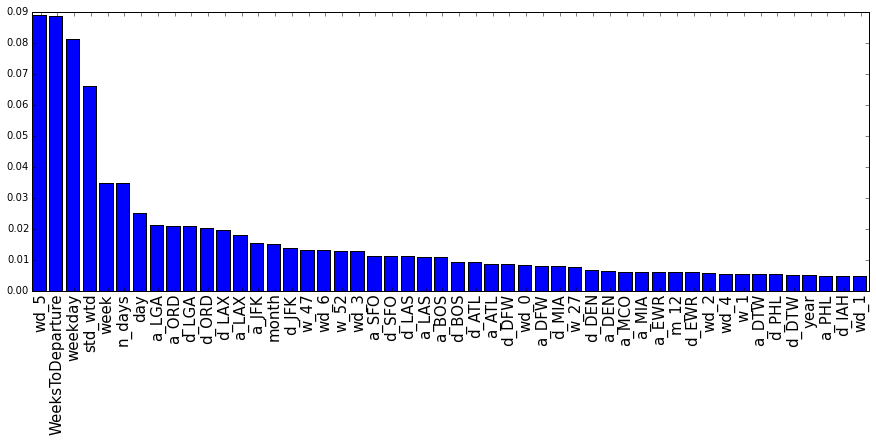

In [35]:
plt.figure(figsize=(15, 5))

ordering = np.argsort(reg.feature_importances_)[::-1][:50]

importances = reg.feature_importances_[ordering]
feature_names = X_columns[ordering]

x = np.arange(len(feature_names))
plt.bar(x, importances)
plt.xticks(x + 0.5, feature_names, rotation=90, fontsize=15);

### The feature extractor

The feature extractor implements a single <code>transform</code> function. It receives the full pandas object X_df (without the labels). It should produce a numpy array representing the features extracted. If you want to use the (training) labels to save soem state of the feature extrctor, you can do it in the fit function. 


You can choose one of the example feature extractors and copy-paste it into your feature_extractor.py file.

In [50]:
class FeatureExtractor(object):
    def __init__(self):
        pass

    def fit(self, X_df, y_array):
        pass

    def transform(self, X_df):
        X_encoded = X_df
        X_encoded = X_encoded.join(pd.get_dummies(X_encoded['Departure'], prefix='d'))
        X_encoded = X_encoded.join(pd.get_dummies(X_encoded['Arrival'], prefix='a'))
        X_encoded = X_encoded.drop('Departure', axis=1)
        X_encoded = X_encoded.drop('Arrival', axis=1)
        X_encoded = X_encoded.drop('DateOfDeparture', axis=1)
        X_array = X_encoded.values
        return X_array

In [73]:
class FeatureExtractor(object):
    def __init__(self):
        pass

    def fit(self, X_df, y_array):
        pass

    def transform(self, X_df):
        X_encoded = X_df
        
        #uncomment the line below in the submission
        #path = os.path.dirname(__file__)
        data_weather = pd.read_csv("data_weather.csv")
        
        X_weather = data_weather[['Date', 'AirPort', 'Max TemperatureC']]
        X_weather = X_weather.rename(columns={'Date': 'DateOfDeparture', 'AirPort': 'Arrival'})
        X_encoded = X_encoded.set_index(['DateOfDeparture', 'Arrival'])
        X_weather = X_weather.set_index(['DateOfDeparture', 'Arrival'])
        X_encoded = X_encoded.join(X_weather).reset_index()
        
        X_encoded = X_encoded.join(pd.get_dummies(X_encoded['Departure'], prefix='d'))
        X_encoded = X_encoded.join(pd.get_dummies(X_encoded['Arrival'], prefix='a'))
        X_encoded = X_encoded.drop('Departure', axis=1)
        X_encoded = X_encoded.drop('Arrival', axis=1)

        X_encoded = X_encoded.drop('DateOfDeparture', axis=1)
        X_array = X_encoded.values
        return X_array

### The regressor

The regressor should implement an sklearn-like regressor with fit and predict functions. You can copy paste either of these into your first regressor.py file.

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import BaseEstimator

class Regressor(BaseEstimator):
    def __init__(self):
        self.clf = RandomForestRegressor(n_estimators=10, max_depth=10, max_features=10)

    def fit(self, X, y):
        self.clf.fit(X, y)

    def predict(self, X):
        return self.clf.predict(X)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator

class Regressor(BaseEstimator):
    def __init__(self):
        self.clf = LinearRegression()

    def fit(self, X, y):
        self.clf.fit(X, y)

    def predict(self, X):
        return self.clf.predict(X)

### Unit test

This cells unit-tests your selected regressor and feature extractor and print the RMSE.

In [62]:
def train_model(X_df, y_array, skf_is):
    fe = FeatureExtractor()
    fe.fit(X_df, y_array)
    X_array = fe.transform(X_df)
    # Regression
    train_is, _ = skf_is
    X_train_array = np.array([X_array[i] for i in train_is])
    y_train_array = np.array([y_array[i] for i in train_is])
    reg = Regressor()
    reg.fit(X_train_array, y_train_array)
    return fe, reg

def test_model(trained_model, X_df, skf_is):
    fe, reg = trained_model
    # Feature extraction
    X_array = fe.transform(X_df)
    # Regression
    _, test_is = skf_is
    X_test_array = np.array([X_array[i] for i in test_is])
    y_pred_array = reg.predict(X_test_array)
    return y_pred_array

In [74]:
from sklearn.cross_validation import ShuffleSplit

data = pd.read_csv("data_amadeus.csv")
X_df = data.drop(['PAX', 'log_PAX'], axis=1)
y_array = data['log_PAX'].values

skf = ShuffleSplit( y_array.shape[0], n_iter=2, test_size=0.2, random_state=61)
skf_is = list(skf)[0]

trained_model = train_model(X_df, y_array, skf_is)
y_pred_array = test_model(trained_model, X_df, skf_is)
_, test_is = skf_is
ground_truth_array = y_array[test_is]

score = np.sqrt(np.mean(np.square(ground_truth_array - y_pred_array)))
print score

0.487969712679


## Submission

For submitting your code, first create a git repo and enter its public address (https://...) at the submission site. Place your to files <code>regressor.py</code>, and <code>feature_extractor.py</code> in the git repo, and then run the following sequence.

<code>
git add regressor.py feature_extractor.py [other files like outside data]
git commit -m "my commit log"
git tag model_description
git push origin master --tags
</code>

We will fetch your submission. At this point it will appear in the "New models" table with your teamname and <code>model_description</code> as the name of the submission. Once it is trained, it will either be added to the leaderboards, or it will appear in the "Failed models" table. Clicking on “error” will bring you to the error that python threw.

Fetching and training is not automatical, it may take some time for your model to appear in the leaderboard.

### Deleting failed models

You cannot delete models once they appear in the leaderboard. However, you can delete failed models by executing the following sequence:

<code>
git tag -d model_description
git push origin :refs/tags/model_description
</code>

The first command deletes your local tag and the second command deletes the remote tag. When we fetch next time, the model will disappear from the table. You can then reuse the tag to resubmit another model.